# Task 1- Yuval Shmuel 206616377, Shiran Dani 207382912

## tokenization- Q2:

In [103]:
import pandas as pd

df = pd.read_csv('spam_ham_dataset.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [104]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#adding a column in the data for the tokenized text
df["text_tokenized"] = df["text"].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
df.head()

,Unnamed: 0,label,text,label_num,text_tokenized
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea..."


## EDA- Q3

In [106]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")

In [107]:
#check the amount of spam and ham labels in the data
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [108]:
#adding a new column to the data for the length of the characters in the text for each row
df["len_of_txt"] = df.text.map(lambda x: len(x))
df.head()

,Unnamed: 0,label,text,label_num,text_tokenized,len_of_txt
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ...",322
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200...",97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...",2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,...",414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea...",336


In [109]:
def create_hist_def(feature):
    a = df[df.label_num == 0][feature]
    b = df[df.label_num == 1][feature]

    h = plt.hist(a, color="blue", bins=50)
    h = plt.hist(b, color="yellow", bins=50)
    return h

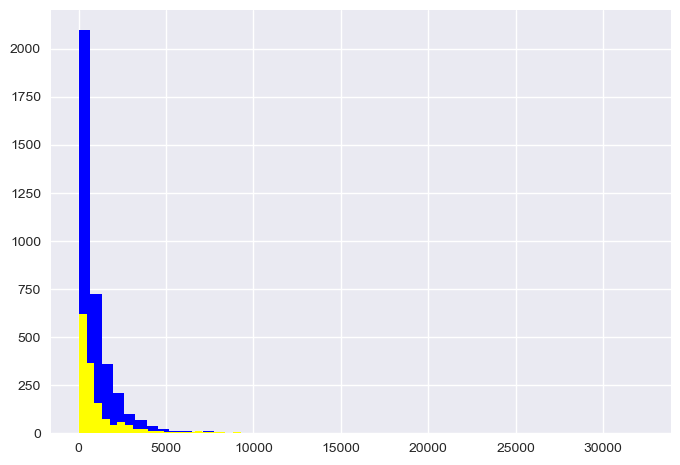

In [110]:
#visualization of the 'len of txt' column for each label- spam and ham
create_hist = create_hist_def("len_of_txt")

In [111]:
#add a new column to the data for the amount of punctuation in the text for each row

import string
df['punctuation'] = df["text"].map(lambda x: len([c for c in str(x) if c in string.punctuation]))
df.head()

,Unnamed: 0,label,text,label_num,text_tokenized,len_of_txt,punctuation
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ...",322,15
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200...",97,8
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...",2524,82
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,...",414,5
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea...",336,7


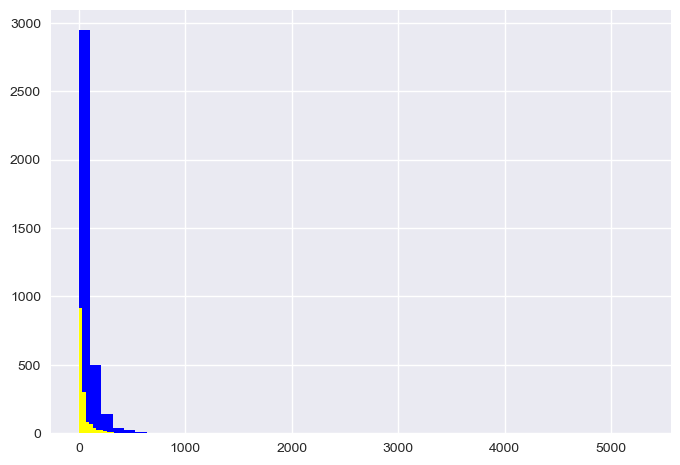

In [112]:
#visualization of the 'punctuation' column for each label- spam and ham
create_hist = create_hist_def("punctuation")

## Features- Q4

In [113]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [114]:
x_train = train["text"]
y_train = train["label_num"]
x_test = test["text"]
y_test = test["label_num"]

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
vectorizer = TfidfVectorizer(stop_words="english")

In [117]:
tfidf_x_train = vectorizer.fit_transform(x_train)
tfidf_x_test = vectorizer.transform(x_test)

In [118]:
feature_names = vectorizer.get_feature_names_out()

## logistic regression- Q5:

In [119]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=5, max_iter=1000)

In [120]:
classifier.fit(tfidf_x_train,y_train)
test_prediction = classifier.predict(tfidf_x_test)

## Q6:

In [121]:
from sklearn import metrics


In [122]:
accuracy = metrics.accuracy_score(y_test,test_prediction)
print(accuracy)

0.9864734299516909


In [123]:
recall= metrics.recall_score(y_test,test_prediction)
print(recall)

0.9756944444444444


In [124]:
precision = metrics.precision_score(y_test,test_prediction)
print(precision)

0.9756944444444444


In [125]:
f1_score = metrics.f1_score(y_test,test_prediction)
print(f1_score)

0.9756944444444444


## Q7:

In [126]:
from sklearn.tree import DecisionTreeClassifier


In [127]:
classifier_DecisionTree = DecisionTreeClassifier(random_state=2)

In [128]:
classifier_DecisionTree.fit(tfidf_x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [129]:
test_predict_DecisionTree = classifier_DecisionTree.predict(tfidf_x_test)

In [130]:
accuracy_DecisionTree = metrics.accuracy_score(y_test, test_predict_DecisionTree)
print("accuracy:", accuracy_DecisionTree)


accuracy: 0.9526570048309179


In [131]:
recall_DecisionTree = metrics.recall_score(y_test, test_predict_DecisionTree)
print("recall:", recall_DecisionTree)


recall: 0.9166666666666666


In [132]:
precision_DecisionTree = metrics.precision_score(y_test, test_predict_DecisionTree)
print("precision:", precision_DecisionTree)


precision: 0.9134948096885813


In [133]:
f1_score_DecisionTree = metrics.f1_score(y_test, test_predict_DecisionTree)
print("f1_score:", f1_score_DecisionTree)

f1_score: 0.9150779896013864


In [134]:
#linear regression:

from sklearn.linear_model import LinearRegression
linear_classifier = LinearRegression()

In [135]:
linear_classifier.fit(tfidf_x_train,y_train)

LinearRegression()

In [136]:
test_prediction_linear = linear_classifier.predict(tfidf_x_test)

In [137]:
test_prediction_linear[test_prediction_linear > 0.5] = 1
test_prediction_linear[test_prediction_linear <= 0.5] = 0
accuracy_linear = metrics.accuracy_score(y_test, test_prediction_linear)
print("accuracy:", accuracy_linear)


accuracy: 0.9565217391304348


In [138]:
recall_linear = metrics.recall_score(y_test, test_prediction_linear)
print("recall:", recall_linear)


recall: 0.8680555555555556


In [139]:
precision_linear = metrics.precision_score(y_test, test_prediction_linear)
print("precision:", precision_linear)


precision: 0.9727626459143969


In [140]:
f1_score_linear = metrics.f1_score(y_test, test_prediction_linear)
print("f1_score:", f1_score_linear)

f1_score: 0.9174311926605505


In [141]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=7)

In [142]:
KNN_classifier.fit(tfidf_x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [143]:
test_prediction_KNN = KNN_classifier.predict(tfidf_x_test)

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [144]:
accuracy_knn = metrics.accuracy_score(y_test, test_prediction_KNN)
print("accuracy:", accuracy_knn)


accuracy: 0.9584541062801932


In [145]:
recall_knn = metrics.recall_score(y_test, test_prediction_KNN)
print("recall:", recall_knn)


recall: 0.8715277777777778


In [146]:
precision_knn = metrics.precision_score(y_test, test_prediction_KNN)
print("precision:", precision_knn)


precision: 0.9766536964980544


In [147]:
f1_score_knn = metrics.f1_score(y_test, test_prediction_KNN)
print("f1_score:", f1_score_knn)

f1_score: 0.9211009174311926


## Q8:

In [148]:
matrix_scores = [[accuracy,recall,precision,f1_score],
 [accuracy_DecisionTree,recall_DecisionTree,precision_DecisionTree,f1_score_DecisionTree],
 [accuracy_linear,recall_linear,precision_linear,f1_score_linear],
 [accuracy_knn,recall_knn,precision_knn,f1_score_knn]]


In [149]:
print(matrix_scores)

[[0.9864734299516909, 0.9756944444444444, 0.9756944444444444, 0.9756944444444444], [0.9526570048309179, 0.9166666666666666, 0.9134948096885813, 0.9150779896013864], [0.9565217391304348, 0.8680555555555556, 0.9727626459143969, 0.9174311926605505], [0.9584541062801932, 0.8715277777777778, 0.9766536964980544, 0.9211009174311926]]


In [150]:
#Entering all the data in the matrix into DataFrame
df_scores = pd.DataFrame(matrix_scores,
                         index=['Logistic Regression', 'decision Tree', 'Linear regression', 'knn'],
                         columns=['accuracy','recall','precision','f1-score'])
print("Scores dataframe:")
print(df_scores)

Scores dataframe:
                     accuracy    recall  precision  f1-score
Logistic Regression  0.986473  0.975694   0.975694  0.975694
decision Tree        0.952657  0.916667   0.913495  0.915078
Linear regression    0.956522  0.868056   0.972763  0.917431
knn                  0.958454  0.871528   0.976654  0.921101


## Q9:

#### as you can see, the prediction model with the higest metrics is the logistic regression. 
#### that can happen from some reasons:
#### The model describes a possible relationship between a categorical variable and other variables.
#### The model makes it possible to estimate the influence of the change in the value of each of the explanatory variables on the value of the explained variable.
#### The model allows identifying a relationship between variables